![img](https://drive.google.com/uc?export=view&id=1kgX98Ziw9LzgBCT2BxChttfrTcBltLej)




## **Proyecto**:    [AC](https://drive.google.com/file/d/1vvoaG0uXbeJZbixEi8K5twJM1m_CIE8v/view?usp=sharing)


##### **MATERIA: HERRAMIENTAS PARA ANÁLISIS DE DATOS**
##### **Lic. Consuelo Nuñez**

----

## **Contexto**


Crece en todo el mundo la conciencia sobre la necesidad de generar **cambio de hábitos** respecto de cómo nos relacionamos con los **recursos naturales** para la satisfacción de nuestras necesidades. Estamos en el momento en el que la transformación que esperamos aún no ha ocurrido, pero esto no disminuye la urgencia ni la necesidad de que ocurra.

La actual crisis ambiental es fundamentalmente una **oportunidad** de cambio. Este es el momento de la oportunidad, concepto que está directamente ligado a la **responsabilidad**. 

El agua es esencial para la vida y todos tenemos mucho que hacer para cuidarla. Contar con agua potable por más tiempo depende del **uso responsable** que hagamos de ella.

Según la Organización Mundial de la Salud, son necesarios entre 50 y 100 litros de agua por persona por día para garantizar que se cubran las necesidades básicas y preservar la salud. Es importante tomar **consciencia** de **nuestro consumo** y realizar un **uso responsable** que permita contar con este recurso muchos años más.


## **Objetivo**

A partir del **análisis exploratorio** de la base de datos de los clientes, de la empresa que suministra el servicio de agua, se propone **analizar el consumo** de agua potable de los **usuarios residenciales** de la Ciudad de Córdoba.  

El consumo de agua está determinado por diferentes factores, tales como: climático (temperatura, precipitación pluvial, humedad relativa), social (habitantes por vivienda, composición familiar, nivel de educación, estrato social), económico (ingreso familiar, precio del agua, consumo histórico) y cultural (estilo de vida de las personas, valores, educación, normas y modelos sociales, creencias asociadas a la conducta ambiental).

El factor económico es determinante, conforme aumenta el nivel económico, también lo hace el consumo de agua debido en muchos casos a elementos externos a la vivienda que consume agua (jardines, piletas, lavadrropas, etc.). Las variables climáticas también se correlacionan significativamente con el uso de agua per cápita en la mayoría de las escalas de tiempo, con temperaturas media, mínima y máxima y la longitud de la luz del día correlacionada positivamente; la precipitación, la velocidad del viento, la humedad relativa y la nubosidad muestran una relación inversa con el uso del agua.

El estudio pretende analizar el consumo de agua potable de los usuarios residenciales (pertenecientes al parque medido y que se encuentren con el servicio habilitado) y observar si el mismo está influenciado por el **nivel socioeconómico** dado por la clasificación **zonal** que emplea la empresa y por alguna característica del **tipo de inmueble**.

Además, se propone analizar si existe **variación estacional e interanual** en el consumo de agua.

## **Base de Datos**

Se cuenta con la Base de datos de los clientes de la empresa AC encargada de suministrar el servicio de agua en la ciudad de Córdoba.

El conjunto de datos incluye: información sobre el cliente, sobre el inmueble y sobre el consumo de agua.

Se analiza la base de datos aplicando técnicas que permiten conocer en profundidad el conjunto de datos con el que se cuenta. Buscando analizar si la misma presenta inconsistencias, tales como falta de registros, columnas en blanco, información incorrecta, entre otras. Y ante cada caso se aplicará el criterio correspondiente para obtener una base de calidad, limpia y preparada, que posteriormente permita obtener modelos de datos de calidad y minimizar los posibles errores que puedan ocurrir más adelante en el proceso de modelado.

Es decir, se buscará:

*   Extraer variables importantes y desestimar variables inútiles.
*   Identificar valores atípicos, valores perdidos o errores humanos.
*   Comprender la/s relación/es (o la falta) entre variables de interés.





## **Se importan las librerías necesarias y la base de datos**

In [ ]:
#Importamos todas las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import plotly.express as px
import seaborn as sns  
import datetime

In [ ]:
#Creamos el dataframe con la base de datos de AC

# 1. Url del .xlxs en Drive donde tenemos los datos
url = 'https://drive.google.com/file/d/14rM94qhD3J6ybAe20vRKCiuWAIK1Ue2T/view?usp=sharing'

# 2. Tomamos el id de la url (), mediante la funcion split
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]

# 3. Leemos el dataframe
dfAC= pd.read_excel(path)   # 4. Si la columna "unidad" (o alguna otra) representara un identificador único de cada fila,  dfAC= pd.read_excel(path, index_col="unidad")
dfAC.head()                    # se podría reemplazar el identificador secuencial de filas que pandas automáticamente provee por este identificador "unidad" 


,unidad,dad_alt,razon,seccion,manzana,parcela,calle_inm,numero_inm,cod_pos_inm,dat_complem_inm,barrio_inm,situacion,cortable,clase de fact,medido,habitable,tipo_inm,subtipo_inm,cod_actividad,actividad Actual,cat_tar,categoria,clase,subclase,ibm,zonal,coeficiente,a_facturar,ult_per_fact,ult_mon_fact,prom_ult_6meses_fact,tpo_med,num_med,marca,diametro,can_dig,Caudal nominal,fec_alt,pto_cx,calle_pto_cx,num_pto_cx,cod_pos_pto_cx,dat_complem_pto_cx,barrio_pto_cx,gpo_ruta,ruta_med,ruta_sec,base libre,consumo_hist,fec_dde_his,fec_has_his,pro_his_cons_dia,consumo_anio_actual,fec_dde_aact,fec_fas_aact,prom_dia_anio_act,con_mes_01,fec_des_m01,fec_has_m01,prom_con_dia_m01,con_mes_02,fec_des_m02,fec_has_m02,prom_con_dia_m02,con_mes_03,fec_des_m03,fec_has_m03,prom_con_dia_m03,con_mes_04,fec_des_m04,fec_has_m04,prom_con_dia_m04,con_mes_05,fec_des_m05,fec_has_m05,prom_con_dia_m05,con_mes_06,fec_des_m06,fec_has_m06,prom_con_dia_m06,con_mes_07,fec_des_m07,fec_has_m07,prom_con_dia_m07,con_mes_08,fec_des_m08,fec_has_m08,prom_con_dia_m08,con_mes_09,fec_des_m09,fec_has_m09,prom_con_dia_m09,con_mes_10,fec_des_m10,fec_has_m10,prom_con_dia_m10,con_mes_11,fec_des_m11,fec_has_m11,prom_con_dia_m11,con_mes_12,fec_des_m12,fec_has_m12,prom_con_dia_m12,cons_anio_1,fec_dde_anio1,fec_has_anio1,prom_dia_anio1,cons_anio_2,fec_dde_anio2,fec_has_anio2,prom_dia_anio2,cons_anio_3,fec_dde_anio3,fec_has_anio3,prom_dia_anio3,cons_anio_4,fec_dde_anio4,fec_has_anio4,prom_dia_anio4,cons_anio_5,fec_dde_anio5,fec_has_anio5,prom_dia_anio5,calle_postal,numero_postal,cod_pos_postal,dat_complem_postal,barrio_postal,Unnamed: 129
0,200001,32202000010006,PALACIOS HNOS.S.R.L.,101,1,1200000,"JUSTO, JUAN B.",4112.0,5001,N_izq 4120,AYACUCHO,HA,S,M05,S,S,PV,1,1291,Ctros Comerc c/locales comidas,B2,PC,GR,NR,27.16,Z03,NaN,499.54,2018-04,194.03,152.44,ACCM,A12S108888,Actaris-Multimag-15/20/25 -con Cyble CV,15,5,MAGNETICO,2013-08-05,3220200001000600,JAMAICA,7.0,5001,S/J.B. JUSTO,AYACUCHO,N2,GMB-N-R732,22800,17.75,2734.0,1998-01-20 00:00:00,2018-04-09,0.37,54.0,2017-12-05 00:00:00,2018-04-09,0.43,5.0,2017-04-07,2017-05-08,0.16,3.0,2017-05-08,2017-06-07,0.10,6.0,2017-06-07,2017-07-07,0.20,5.0,2017-07-07,2017-08-04,0.18,15.0,2017-08-04,2017-09-05,0.47,6.0,2017-09-05,2017-10-05,0.20,5.0,2017-10-05 00:00:00,2017-11-06,0.16,4.0,2017-11-06 00:00:00,2017-12-05,0.14,9.0,2017-12-05 00:00:00,2018-01-09,0.26,9.0,2018-01-09 00:00:00,2018-02-06,0.32,13.0,2018-02-06 00:00:00,2018-03-09,0.42,23.0,2018-03-09 00:00:00,2018-04-09,0.74,74.0,2012-12-12 00:00:00,2013-12-10,0.2,40.0,2013-12-10 00:00:00,2014-12-11,0.11,47.0,2014-12-11 00:00:00,2015-12-09,0.13,58.0,2015-12-09 00:00:00,2016-12-07,0.16,73.0,2016-12-07 00:00:00,2017-12-05,0.2,HUMBERTO 1³,170.0,5000.0,NaN,CENTRO,NaN
1,200008,32202000080009,EFRAIN ARMANDO RIVERA,101,1,2700000,"JUSTO, JUAN B.",4192.0,5001,,AYACUCHO,TC,S,M05,S,S,PV,1,90,Guardacoches,B1,PC,GR,NR,42.32,Z03,NaN,778.23,2018-04,237.98,258.91,ACCU,A16S101001,Actaris-Unimag-15/20/25 mm-con Cyble CV,15,5,NaN,2017-09-06,3220200008000900,"JUSTO, JUAN B.",4192.0,5001,NaN,AYACUCHO,N2,GMB-N-R732,22700,35.26,3746.0,1998-01-15 00:00:00,2018-04-09,0.51,114.0,2017-12-05 00:00:00,2018-04-09,0.91,32.0,2017-04-07,2017-05-08,1.03,37.0,2017-05-08,2017-06-07,1.23,40.0,2017-06-07,2017-07-07,1.33,28.0,2017-07-07,2017-08-04,1.00,15.0,2017-08-04,2017-09-05,0.47,49.0,2017-09-05,2017-10-05,1.63,56.0,2017-10-05 00:00:00,2017-11-06,1.75,47.0,2017-11-06 00:00:00,2017-12-05,1.62,30.0,2017-12-05 00:00:00,2018-01-09,0.86,26.0,2018-01-09 00:00:00,2018-02-06,0.93,35.0,2018-02-06 00:00:00,2018-03-09,1.13,23.0,2018-03-09 00:00:00,2018-04-09,0.74,110.0,2012-12-12 00:00:00,2013-12-10,0.3,84.0,2013-12-10 00:00:00,2014-12-11,0.23,120.0,2014-12-11 00:00:00,2015-12-09,0.33,223.0,2015-12-09 00:00:00,2016-12-07,0.61,455.0,2016-12-07 00:00:00,2017-12-05,1.25,"PARRAVICINI, FLORENCIO",2410.0,5001.0,NaN,CENTRO AMERICA,NaN
2,200019,32202000190006,CHIARETTA LORENZO,102,2,800000,"ALEM, LEANDRO N. AV.",2047.0,5012,NaN,RESIDENCIAL AMERICA,HA

## **Comenzando con el análisis de la base de datos**

In [ ]:
# ¿Qué tipo de objeto es dfAC? ¿Cuántas filas y columnas tiene? 

dfAC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158335 entries, 0 to 158334
Columns: 130 entries, unidad to Unnamed: 129
dtypes: datetime64[ns](26), float64(34), int64(9), object(61)
memory usage: 157.0+ MB


La base de datos es un dataframe, que contiene 158.335 filas y 130 columnas. Y contiene datos de diferente tipo.


In [ ]:
#Mostramos todas las columnas

pd.options.display.max_columns
pd.options.display.max_columns = None
dfAC.head(2)

,unidad,dad_alt,razon,seccion,manzana,parcela,calle_inm,numero_inm,cod_pos_inm,dat_complem_inm,barrio_inm,situacion,cortable,clase de fact,medido,habitable,tipo_inm,subtipo_inm,cod_actividad,actividad Actual,cat_tar,categoria,clase,subclase,ibm,zonal,coeficiente,a_facturar,ult_per_fact,ult_mon_fact,prom_ult_6meses_fact,tpo_med,num_med,marca,diametro,can_dig,Caudal nominal,fec_alt,pto_cx,calle_pto_cx,num_pto_cx,cod_pos_pto_cx,dat_complem_pto_cx,barrio_pto_cx,gpo_ruta,ruta_med,ruta_sec,base libre,consumo_hist,fec_dde_his,fec_has_his,pro_his_cons_dia,consumo_anio_actual,fec_dde_aact,fec_fas_aact,prom_dia_anio_act,con_mes_01,fec_des_m01,fec_has_m01,prom_con_dia_m01,con_mes_02,fec_des_m02,fec_has_m02,prom_con_dia_m02,con_mes_03,fec_des_m03,fec_has_m03,prom_con_dia_m03,con_mes_04,fec_des_m04,fec_has_m04,prom_con_dia_m04,con_mes_05,fec_des_m05,fec_has_m05,prom_con_dia_m05,con_mes_06,fec_des_m06,fec_has_m06,prom_con_dia_m06,con_mes_07,fec_des_m07,fec_has_m07,prom_con_dia_m07,con_mes_08,fec_des_m08,fec_has_m08,prom_con_dia_m08,con_mes_09,fec_des_m09,fec_has_m09,prom_con_dia_m09,con_mes_10,fec_des_m10,fec_has_m10,prom_con_dia_m10,con_mes_11,fec_des_m11,fec_has_m11,prom_con_dia_m11,con_mes_12,fec_des_m12,fec_has_m12,prom_con_dia_m12,cons_anio_1,fec_dde_anio1,fec_has_anio1,prom_dia_anio1,cons_anio_2,fec_dde_anio2,fec_has_anio2,prom_dia_anio2,cons_anio_3,fec_dde_anio3,fec_has_anio3,prom_dia_anio3,cons_anio_4,fec_dde_anio4,fec_has_anio4,prom_dia_anio4,cons_anio_5,fec_dde_anio5,fec_has_anio5,prom_dia_anio5,calle_postal,numero_postal,cod_pos_postal,dat_complem_postal,barrio_postal,Unnamed: 129
0,200001,32202000010006,PALACIOS HNOS.S.R.L.,101,1,1200000,"JUSTO, JUAN B.",4112.0,5001,N_izq 4120,AYACUCHO,HA,S,M05,S,S,PV,1,1291,Ctros Comerc c/locales comidas,B2,PC,GR,NR,27.16,Z03,NaN,499.54,2018-04,194.03,152.44,ACCM,A12S108888,Actaris-Multimag-15/20/25 -con Cyble CV,15,5,MAGNETICO,2013-08-05,3220200001000600,JAMAICA,7.0,5001,S/J.B. JUSTO,AYACUCHO,N2,GMB-N-R732,22800,17.75,2734.0,1998-01-20 00:00:00,2018-04-09,0.37,54.0,2017-12-05 00:00:00,2018-04-09,0.43,5.0,2017-04-07,2017-05-08,0.16,3.0,2017-05-08,2017-06-07,0.10,6.0,2017-06-07,2017-07-07,0.20,5.0,2017-07-07,2017-08-04,0.18,15.0,2017-08-04,2017-09-05,0.47,6.0,2017-09-05,2017-10-05,0.20,5.0,2017-10-05 00:00:00,2017-11-06,0.16,4.0,2017-11-06 00:00:00,2017-12-05,0.14,9.0,2017-12-05 00:00:00,2018-01-09,0.26,9.0,2018-01-09 00:00:00,2018-02-06,0.32,13.0,2018-02-06 00:00:00,2018-03-09,0.42,23.0,2018-03-09 00:00:00,2018-04-09,0.74,74.0,2012-12-12 00:00:00,2013-12-10,0.2,40.0,2013-12-10 00:00:00,2014-12-11,0.11,47.0,2014-12-11 00:00:00,2015-12-09,0.13,58.0,2015-12-09 00:00:00,2016-12-07,0.16,73.0,2016-12-07 00:00:00,2017-12-05,0.2,HUMBERTO 1³,170.0,5000.0,NaN,CENTRO,NaN
1,200008,32202000080009,EFRAIN ARMANDO RIVERA,101,1,2700000,"JUSTO, JUAN B.",4192.0,5001,,AYACUCHO,TC,S,M05,S,S,PV,1,90,Guardacoches,B1,PC,GR,NR,42.32,Z03,NaN,778.23,2018-04,237.98,258.91,ACCU,A16S101001,Actaris-Unimag-15/20/25 mm-con Cyble CV,15,5,NaN,2017-09-06,3220200008000900,"JUSTO, JUAN B.",4192.0,5001,NaN,AYACUCHO,N2,GMB-N-R732,22700,35.26,3746.0,1998-01-15 00:00:00,2018-04-09,0.51,114.0,2017-12-05 00:00:00,2018-04-09,0.91,32.0,2017-04-07,2017-05-08,1.03,37.0,2017-05-08,2017-06-07,1.23,40.0,2017-06-07,2017-07-07,1.33,28.0,2017-07-07,2017-08-04,1.00,15.0,2017-08-04,2017-09-05,0.47,49.0,2017-09-05,2017-10-05,1.63,56.0,2017-10-05 00:00:00,2017-11-06,1.75,47.0,2017-11-06 00:00:00,2017-12-05,1.62,30.0,2017-12-05 00:00:00,2018-01-09,0.86,26.0,2018-01-09 00:00:00,2018-02-06,0.93,35.0,2018-02-06 00:00:00,2018-03-09,1.13,23.0,2018-03-09 00:00:00,2018-04-09,0.74,110.0,2012-12-12 00:00:00,2013-12-10,0.3,84.0,2013-12-10 00:00:00,2014-12-11,0.23,120.0,2014-12-11 00:00:00,2015-12-09,0.33,223.0,2015-12-09 00:00:00,2016-12-07,0.61,455.0,2016-12-07 00:00:00,2017-12-05,1.25,"PARRAVICINI, FLORENCIO",2410.0,5001.0,NaN,CENTRO AMERICA,NaN


El dataframe contiene información sobre los usuarios del servicio de agua provisto por la empresa AC. Cada **fila** corresponde a un usuario y cada **columna** a una variable.

El conjunto de datos incluye información sobre el cliente, sobre el inmueble, sobre el servicio y consumo de agua.

En el siguiente [link](https://docs.google.com/document/d/1YKubuNMcAQMNysfaAL3C8ObgoWBqgu9DrRXIrIT23fU/edit?usp=sharing) se adjunta la descripción de las variables de la base de datos.

## **Confección del dataframe objeto de estudio**

### Selección de variables

Dentro de la base de datos se seleccionan las variables consideradas relevantes para el análisis. 

Se incluyen las variables: **"unidad"** para identificar al usuario,**"medido"** brinda información de la existencia o no de medidor; **"situación"** hace referencia a la situación del usuario en caunto al estado del servicio; **"subclase"** discrimina entre usuarios residenciales y no residenciales; **"zonal"** indica nivel socioeconómico; **"clase de fact"** agrupa los usuarios por tipo de medición y facturación (M04 es la única categoría que tiene medición mensual); **"actividad"** permite discriminar en viviendas entre otras actividades; **"tipo_inm"** clasifica según tipo de propiedad; y **"prom_dia_anioX"** y **"prom_con_dia_mX"** que se refieren a consumo (en m3) promedio diario para año X y mes X respectivamente.

In [ ]:
#Seleccionamos las variables que vamos a analizar y generamos el dataframe.
dfACObjetivo = dfAC[['unidad', 'medido', 'situacion', 'subclase', 'clase de fact', 'zonal', 'tipo_inm', 'actividad Actual',
                    'fec_has_anio1', 'prom_dia_anio1', 'fec_has_anio2', 'prom_dia_anio2', 'fec_has_anio3', 'prom_dia_anio3', 'fec_has_anio4', 'prom_dia_anio4', 'fec_has_anio5','prom_dia_anio5', 
                    'prom_con_dia_m01','prom_con_dia_m02','prom_con_dia_m03','prom_con_dia_m04','prom_con_dia_m05','prom_con_dia_m06','prom_con_dia_m07','prom_con_dia_m08','prom_con_dia_m09','prom_con_dia_m10','prom_con_dia_m11','prom_con_dia_m12']]
dfACObjetivo

,unidad,medido,situacion,subclase,clase de fact,zonal,tipo_inm,actividad Actual,fec_has_anio1,prom_dia_anio1,fec_has_anio2,prom_dia_anio2,fec_has_anio3,prom_dia_anio3,fec_has_anio4,prom_dia_anio4,fec_has_anio5,prom_dia_anio5,prom_con_dia_m01,prom_con_dia_m02,prom_con_dia_m03,prom_con_dia_m04,prom_con_dia_m05,prom_con_dia_m06,prom_con_dia_m07,prom_con_dia_m08,prom_con_dia_m09,prom_con_dia_m10,prom_con_dia_m11,prom_con_dia_m12
0,200001,S,HA,NR,M05,Z03,PV,Ctros Comerc c/locales comidas,2013-12-10,0.2,2014-12-11,0.11,2015-12-09,0.13,2016-12-07,0.16,2017-12-05,0.2,0.16,0.10,0.20,0.18,0.47,0.20,0.16,0.14,0.26,0.32,0.42,0.74
1,200008,S,TC,NR,M05,Z03,PV,Guardacoches,2013-12-10,0.3,2014-12-11,0.23,2015-12-09,0.33,2016-12-07,0.61,2017-12-05,1.25,1.03,1.23,1.33,1.00,0.47,1.63,1.75,1.62,0.86,0.93,1.13,0.74
2,200019,S,HA,NR,M05,Z02,PV,Local Venta Menor,2013-12-10,0.04,2014-12-11,0.03,2015-12-09,0.12,2016-12-07,0.07,2017-12-05,0.04,0.03,0.07,0.03,0.07,0.03,0.03,0.0,0.1,0.03,0.07,0.06,0.03
3,200061,N,SE,RE,B02,Z02,PH,Edificios en altura PH,2013-11-21,0.42,2014-11-19,0.23,2015-11-17,0.63,2016-11-16,0.98,2017-11-15,1.03,NaN,NaN,NaN,NaN,NaN,0.63,0.5,0.7,1.14,1.47,1.77,1.33
4,200071,S,HA,RE,B02,Z02,PV,PV Mixto - Mayor Sup. RE,2013-11-21,1.14,2014-11-19,1.09,2015-11-17,1.34,2016-11-16,1.25,2017-11-15,0.5,NaN,NaN,NaN,NaN,NaN,0.60,0.57,0.45,0.41,0.49,0.45,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158330,771250,S,HA,RE,B04,Z02,PV,Viviendas Familiares,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158331,771251,S,HA,RE,B04,Z02,PV,Viviendas Familiares,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158332,771459,S,HA,NR,M05,Z02,PV,Clubes Deportivos sin Pileta,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158333,771460,S,HA,RE,C05,Z02,PV,Viviendas Familiares,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Renombrando las variables (todos los encabezados de columnas)
dfACObjetivo.columns = ['unidad', 'medido', 'situacion', 'subclase', 'clase_segun_fact', 'clase_segun_zonal', 'tipo_inmueble', 'actividad',\
                     'fecha_año1','prom_diario_año1','fecha_año2','prom_diario_año2','fecha_año3','prom_diario_año3','fecha_año4','prom_diario_año4','fecha_año5','prom_diario_año5',\
                     'prom_diario_mes01','prom_diario_mes02','prom_diario_mes03','prom_diario_mes04','prom_diario_mes05','prom_diario_mes06','prom_diario_mes07','prom_diario_mes08','prom_diario_mes09','prom_diario_mes10','prom_diario_mes11','prom_diario_mes12']
dfACObjetivo.head(2)

,unidad,medido,situacion,subclase,clase_segun_fact,clase_segun_zonal,tipo_inmueble,actividad,fecha_año1,prom_diario_año1,fecha_año2,prom_diario_año2,fecha_año3,prom_diario_año3,fecha_año4,prom_diario_año4,fecha_año5,prom_diario_año5,prom_diario_mes01,prom_diario_mes02,prom_diario_mes03,prom_diario_mes04,prom_diario_mes05,prom_diario_mes06,prom_diario_mes07,prom_diario_mes08,prom_diario_mes09,prom_diario_mes10,prom_diario_mes11,prom_diario_mes12
0,200001,S,HA,NR,M05,Z03,PV,Ctros Comerc c/locales comidas,2013-12-10,0.2,2014-12-11,0.11,2015-12-09,0.13,2016-12-07,0.16,2017-12-05,0.2,0.16,0.10,0.20,0.18,0.47,0.20,0.16,0.14,0.26,0.32,0.42,0.74
1,200008,S,TC,NR,M05,Z03,PV,Guardacoches,2013-12-10,0.3,2014-12-11,0.23,2015-12-09,0.33,2016-12-07,0.61,2017-12-05,1.25,1.03,1.23,1.33,1.00,0.47,1.63,1.75,1.62,0.86,0.93,1.13,0.74


In [ ]:
#¿Cuántas filas y columnas tiene? 
print("Cantidad de Filas y Columnas: ", dfACObjetivo.shape)    # .shape devuelve el número de filas por el número de columnas del conjunto de datos.
print()
print("Nombre de las Columnas: ", dfACObjetivo.columns)  # .columns devuelve el nombre de las columnas del conjunto de datos.

Cantidad de Filas y Columnas:  (158335, 30)

Nombre de las Columnas:  Index(['unidad', 'medido', 'situacion', 'subclase', 'clase_segun_fact',
       'clase_segun_zonal', 'tipo_inmueble', 'actividad', 'fecha_año1',
       'prom_diario_año1', 'fecha_año2', 'prom_diario_año2', 'fecha_año3',
       'prom_diario_año3', 'fecha_año4', 'prom_diario_año4', 'fecha_año5',
       'prom_diario_año5', 'prom_diario_mes01', 'prom_diario_mes02',
       'prom_diario_mes03', 'prom_diario_mes04', 'prom_diario_mes05',
       'prom_diario_mes06', 'prom_diario_mes07', 'prom_diario_mes08',
       'prom_diario_mes09', 'prom_diario_mes10', 'prom_diario_mes11',
       'prom_diario_mes12'],
      dtype='object')


### Se filtra la base de datos para focalizar el análisis a los objetivos planteados, y se genera un nuevo dataframe


Dado que el objetivo del análisis exploratorio es estudiar el **comportamiento del consumo de los usuarios residenciales**, se necesita filtrar el dataframe y seleccionar sólo a los usuarios que poseen **medidor**, que tengan el **servicio habilitado** y que pertenezcan a la categoría **residencial**. 

Es decir, el foco del análisis reside en los usuarios:

*   que pertenecen al **parque medido** (requisito fundamental para tener registros de consumo es que el usuario posea medidor)
*   que se encuentran **habilitados** (evitando analizar datos de usuarios con servicio eventual, interrumpido, cortado, etc, ya que distorionaría los resultados)
*   que pertenecen a la categoría **residencial** (no incluyendo en el análisis a los usuarios no residenciales)

#### De la base de datos se selecciona el **PARQUE MEDIDO**

In [ ]:
#Seleccionamos solo el parque medido

#Contamos el parque medido
dfACObjetivo['medido'].value_counts()

S    152900
N      5435
Name: medido, dtype: int64

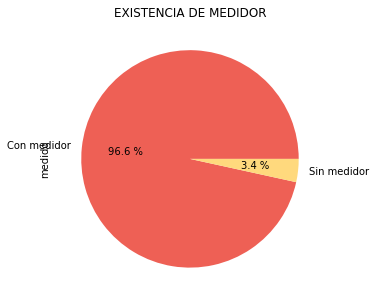

In [ ]:
#Graficamos el parque medido vs parque no medido
nombres = ["Con medidor","Sin medidor"]
colores = ["#EE6055","#FFD97D"]
dfACObjetivo['medido'].value_counts().plot(kind='pie', autopct="%0.1f %%", 
                                            figsize=(5, 5),
                                            title='EXISTENCIA DE MEDIDOR',
                                            labels=nombres,
                                            colors=colores,
)

plt.show() 

In [ ]:
#Filtramos el dataframe aplicando la condición de que posea medidor

ParqueMedido= dfACObjetivo['medido']=='S'

dfACmed = dfACObjetivo[ParqueMedido]
pd.options.display.max_columns
pd.options.display.max_columns = None
dfACmed.head(2)

,unidad,medido,situacion,subclase,clase_segun_fact,clase_segun_zonal,tipo_inmueble,actividad,fecha_año1,prom_diario_año1,fecha_año2,prom_diario_año2,fecha_año3,prom_diario_año3,fecha_año4,prom_diario_año4,fecha_año5,prom_diario_año5,prom_diario_mes01,prom_diario_mes02,prom_diario_mes03,prom_diario_mes04,prom_diario_mes05,prom_diario_mes06,prom_diario_mes07,prom_diario_mes08,prom_diario_mes09,prom_diario_mes10,prom_diario_mes11,prom_diario_mes12
0,200001,S,HA,NR,M05,Z03,PV,Ctros Comerc c/locales comidas,2013-12-10,0.2,2014-12-11,0.11,2015-12-09,0.13,2016-12-07,0.16,2017-12-05,0.2,0.16,0.10,0.20,0.18,0.47,0.20,0.16,0.14,0.26,0.32,0.42,0.74
1,200008,S,TC,NR,M05,Z03,PV,Guardacoches,2013-12-10,0.3,2014-12-11,0.23,2015-12-09,0.33,2016-12-07,0.61,2017-12-05,1.25,1.03,1.23,1.33,1.00,0.47,1.63,1.75,1.62,0.86,0.93,1.13,0.74


In [ ]:
print("El número de usuarios con medidor es:", len(dfACmed),".")

El número de usuarios con medidor es: 152900 .


#### Del PARQUE MEDIDO se selecciona los que cuentan con **SERVICIO HABILITADO**

In [ ]:
#Seleccionamos la columna "situación" 

#Contamos los usuarios con servicio habilitado "HA"
dfACmed['situacion'].value_counts()

HA    138530
I2      6918
TC      2234
IM      1331
CS      1211
N3       601
PT       520
IJ       375
N1       307
N2       241
IF       158
NR       108
CR       105
RO        93
TE        50
IP        43
IT        34
NF        18
DA        11
OC         7
DM         3
DB         2
Name: situacion, dtype: int64

In [ ]:
#Filtramos el dataframe aplicando la condición de que posea servicio habilitado

ServicioHabilitado= dfACmed['situacion']=='HA'

dfACmed_hab = dfACmed[ServicioHabilitado]
pd.options.display.max_columns
pd.options.display.max_columns = None
dfACmed_hab.head(2)

,unidad,medido,situacion,subclase,clase_segun_fact,clase_segun_zonal,tipo_inmueble,actividad,fecha_año1,prom_diario_año1,fecha_año2,prom_diario_año2,fecha_año3,prom_diario_año3,fecha_año4,prom_diario_año4,fecha_año5,prom_diario_año5,prom_diario_mes01,prom_diario_mes02,prom_diario_mes03,prom_diario_mes04,prom_diario_mes05,prom_diario_mes06,prom_diario_mes07,prom_diario_mes08,prom_diario_mes09,prom_diario_mes10,prom_diario_mes11,prom_diario_mes12
0,200001,S,HA,NR,M05,Z03,PV,Ctros Comerc c/locales comidas,2013-12-10,0.2,2014-12-11,0.11,2015-12-09,0.13,2016-12-07,0.16,2017-12-05,0.2,0.16,0.10,0.20,0.18,0.47,0.20,0.16,0.14,0.26,0.32,0.42,0.74
2,200019,S,HA,NR,M05,Z02,PV,Local Venta Menor,2013-12-10,0.04,2014-12-11,0.03,2015-12-09,0.12,2016-12-07,0.07,2017-12-05,0.04,0.03,0.07,0.03,0.07,0.03,0.03,0.0,0.1,0.03,0.07,0.06,0.03


In [ ]:
print("El número de usuarios con medidor y servicio habilitado es:", len(dfACmed_hab),".")

El número de usuarios con medidor y servicio habilitado es: 138530 .


#### Del PARQUE MEDIDO con SERVICIO HABILITADO se selecciona los usuarios **RESIDENCIALES**

In [ ]:
#Seleccionamos la columna "subclases" 

#Contamos los usuarios residenciales "RE"
dfACmed_hab['subclase'].value_counts()

RE    130329
NR      8201
Name: subclase, dtype: int64

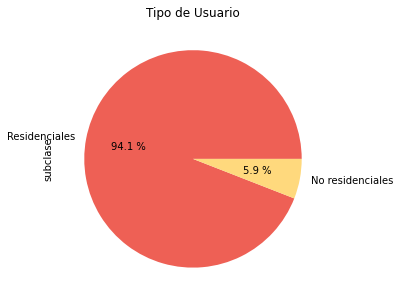

In [ ]:
#Graficamos usuarios residenciales vs no residenciales
nombres = ["Residenciales","No residenciales"]
colores = ["#EE6055","#FFD97D"]
dfACmed_hab['subclase'].value_counts().plot(kind='pie', autopct="%0.1f %%", 
                                            figsize=(5, 5),
                                            title='Tipo de Usuario',
                                            labels=nombres,
                                            colors=colores,
)

plt.show() 

In [ ]:
#Filtramos el dataframe aplicando la condición de que sea usuario residencial

UsuarioResidencial= dfACmed_hab['subclase']=='RE'

dfACmed_hab_res = dfACmed_hab[UsuarioResidencial]
pd.options.display.max_columns
pd.options.display.max_columns = None
dfACmed_hab_res.head(2)

,unidad,medido,situacion,subclase,clase_segun_fact,clase_segun_zonal,tipo_inmueble,actividad,fecha_año1,prom_diario_año1,fecha_año2,prom_diario_año2,fecha_año3,prom_diario_año3,fecha_año4,prom_diario_año4,fecha_año5,prom_diario_año5,prom_diario_mes01,prom_diario_mes02,prom_diario_mes03,prom_diario_mes04,prom_diario_mes05,prom_diario_mes06,prom_diario_mes07,prom_diario_mes08,prom_diario_mes09,prom_diario_mes10,prom_diario_mes11,prom_diario_mes12
4,200071,S,HA,RE,B02,Z02,PV,PV Mixto - Mayor Sup. RE,2013-11-21,1.14,2014-11-19,1.09,2015-11-17,1.34,2016-11-16,1.25,2017-11-15,0.5,NaN,NaN,NaN,NaN,NaN,0.60,0.57,0.45,0.41,0.49,0.45,0.55
5,200087,S,HA,RE,B02,Z02,PV,Viviendas Familiares,NaT,NaN,2014-11-19,0.62,2015-11-17,0.64,2016-11-16,0.44,2017-11-15,0.73,NaN,NaN,NaN,NaN,NaN,0.86,1.41,0.85,0.41,0.36,0.47,0.85


In [ ]:
print("El número de usuarios con medidor, servicio habilitado y del tipo residencial es:", len(dfACmed_hab_res),".")

El número de usuarios con medidor, servicio habilitado y del tipo residencial es: 130329 .


In [ ]:
# Corroborando:
print(len(dfACmed_hab_res.medido.unique ()))
print(dfACmed_hab_res['medido'].value_counts())
print(len(dfACmed_hab_res.situacion.unique ()))
print(dfACmed_hab_res['situacion'].value_counts())
print(len(dfACmed_hab_res.subclase.unique ()))
print(dfACmed_hab_res['subclase'].value_counts())


1
S    130329
Name: medido, dtype: int64
1
HA    130329
Name: situacion, dtype: int64
1
RE    130329
Name: subclase, dtype: int64


### Se genera un dataframe filtrado por usuarios con medidor, servicio habilitado y residencial. Al cual se denomina "dfObjetivo".  

In [ ]:
dfObjetivo = dfACmed_hab_res[['unidad', 'clase_segun_fact', 'clase_segun_zonal', 'tipo_inmueble', 'actividad',
                              'fecha_año1','fecha_año2','fecha_año3','fecha_año4','fecha_año5',
                              'prom_diario_año1','prom_diario_año2','prom_diario_año3','prom_diario_año4','prom_diario_año5',
                              'prom_diario_mes01','prom_diario_mes02','prom_diario_mes03','prom_diario_mes04','prom_diario_mes05','prom_diario_mes06','prom_diario_mes07','prom_diario_mes08','prom_diario_mes09','prom_diario_mes10','prom_diario_mes11','prom_diario_mes12']]

dfObjetivo.head(2)

,unidad,clase_segun_fact,clase_segun_zonal,tipo_inmueble,actividad,fecha_año1,fecha_año2,fecha_año3,fecha_año4,fecha_año5,prom_diario_año1,prom_diario_año2,prom_diario_año3,prom_diario_año4,prom_diario_año5,prom_diario_mes01,prom_diario_mes02,prom_diario_mes03,prom_diario_mes04,prom_diario_mes05,prom_diario_mes06,prom_diario_mes07,prom_diario_mes08,prom_diario_mes09,prom_diario_mes10,prom_diario_mes11,prom_diario_mes12
4,200071,B02,Z02,PV,PV Mixto - Mayor Sup. RE,2013-11-21,2014-11-19,2015-11-17,2016-11-16,2017-11-15,1.14,1.09,1.34,1.25,0.5,NaN,NaN,NaN,NaN,NaN,0.60,0.57,0.45,0.41,0.49,0.45,0.55
5,200087,B02,Z02,PV,Viviendas Familiares,NaT,2014-11-19,2015-11-17,2016-11-16,2017-11-15,NaN,0.62,0.64,0.44,0.73,NaN,NaN,NaN,NaN,NaN,0.86,1.41,0.85,0.41,0.36,0.47,0.85


##**Comenzando a explorar el dataframe**

In [ ]:
#¿Cuántas filas y columnas tiene? 
print("Cantidad de Filas y Columnas: ", dfObjetivo.shape)    # .shape devuelve el número de filas por el número de columnas del conjunto de datos.
print()
print("Nombre de las Columnas: ", dfObjetivo.columns)  # .columns devuelve el nombre de las columnas del conjunto de datos.

Cantidad de Filas y Columnas:  (130329, 27)

Nombre de las Columnas:  Index(['unidad', 'clase_segun_fact', 'clase_segun_zonal', 'tipo_inmueble',
       'actividad', 'fecha_año1', 'fecha_año2', 'fecha_año3', 'fecha_año4',
       'fecha_año5', 'prom_diario_año1', 'prom_diario_año2',
       'prom_diario_año3', 'prom_diario_año4', 'prom_diario_año5',
       'prom_diario_mes01', 'prom_diario_mes02', 'prom_diario_mes03',
       'prom_diario_mes04', 'prom_diario_mes05', 'prom_diario_mes06',
       'prom_diario_mes07', 'prom_diario_mes08', 'prom_diario_mes09',
       'prom_diario_mes10', 'prom_diario_mes11', 'prom_diario_mes12'],
      dtype='object')


El dataframe contiene 130.329 filas y 27 columnas. 

In [ ]:
# Columnas, nulos y tipos de datos
dfObjetivo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130329 entries, 4 to 158334
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   unidad             130329 non-null  int64         
 1   clase_segun_fact   130329 non-null  object        
 2   clase_segun_zonal  130329 non-null  object        
 3   tipo_inmueble      130329 non-null  object        
 4   actividad          130329 non-null  object        
 5   fecha_año1         101278 non-null  datetime64[ns]
 6   fecha_año2         112736 non-null  datetime64[ns]
 7   fecha_año3         116587 non-null  datetime64[ns]
 8   fecha_año4         121403 non-null  datetime64[ns]
 9   fecha_año5         127666 non-null  datetime64[ns]
 10  prom_diario_año1   101278 non-null  object        
 11  prom_diario_año2   112736 non-null  object        
 12  prom_diario_año3   116587 non-null  object        
 13  prom_diario_año4   121403 non-null  object  

En esta salida se obtienen las columnas, el total de filas y la cantidad de filas sin nulos. También los tipos de datos. 

Se procede a observar en detalle qué tipo de datos contiene cada columna del dataframe:

In [ ]:
#Verificamos los tipos de las variables seleccionadas
dfObjetivo.dtypes

unidad                        int64
clase_segun_fact             object
clase_segun_zonal            object
tipo_inmueble                object
actividad                    object
fecha_año1           datetime64[ns]
fecha_año2           datetime64[ns]
fecha_año3           datetime64[ns]
fecha_año4           datetime64[ns]
fecha_año5           datetime64[ns]
prom_diario_año1             object
prom_diario_año2             object
prom_diario_año3             object
prom_diario_año4             object
prom_diario_año5             object
prom_diario_mes01           float64
prom_diario_mes02           float64
prom_diario_mes03           float64
prom_diario_mes04           float64
prom_diario_mes05           float64
prom_diario_mes06           float64
prom_diario_mes07            object
prom_diario_mes08            object
prom_diario_mes09            object
prom_diario_mes10            object
prom_diario_mes11            object
prom_diario_mes12            object
dtype: object

Cuando se importan datos a un Pandas dataframe, Pandas intenta de forma predeterminada conocer los tipos de datos de cada columna.

Según Pandas, el dataframe contiene: 5 columnas con datos tipo datetime, 6 columnas con datos tipo float, 1 columna con datos tipo integer, y 15 columnas con datos tipo object.

En Pandas, las columnas con texto están marcadas por defecto como tipo de datos object. Pero el tipo object tiene un alcance mucho más amplio. No solo puede incluir cadenas de texto, sino también cualquier otro dato que Pandas no comprenda. De hecho, todos pueden ser números o una mezcla de texto, enteros y flotantes.

Al observar en detalle qué tipo de datos contiene cada columna del dataframe, se advierte que algunas de las variables que reflejan consumo de agua figuran como object cuando debieran ser datos de tipo float.

###**Análisis de las variables cualitativas/categóricas**

Se procede a analizar las variables categóricas con la finalidad de reclasificar, recodificar o reagrupar según corresponda.

Variable **clase segun fact**: es una clasificación que agrupa los usuarios por tipo de medición y facturación. No responde a clasificación 100% a clasificación socioeconómica. La clase M04 que corresponde a countries y barrios cerrados es la única categoría que tiene medición mensual, el resto bimensual.

In [ ]:
#Columna "clase segun fact"
print("La variable: clase segun fact, tiene", len(dfObjetivo.clase_segun_fact.unique ()), "etiquetas:")
print()
print(dfObjetivo.clase_segun_fact.unique ())

La variable: clase segun fact, tiene 31 etiquetas:

['B02' 'B0J' 'Y0B' 'B01' 'C02' 'C0J' 'Z0B' 'B0B' 'B03' 'B05' 'A05' 'A0J'
 'A04' 'A0B' 'C04' 'B04' 'C01' 'D03' 'D04' 'C0B' 'C05' 'D05' 'D0B' 'D01'
 'D0J' 'D02' 'M04' 'A01' 'C03' 'A02' 'A03']


In [ ]:
# Agrupamos:
def clean_clase_segun_fact(row):
    
    A = ['A01','A02','A03','A04','A05','A0B','A0J']   
    B = ['B01','B02','B03','B04','B05','B0B','B0J']   
    C = ['C01','C02','C03','C04','C05','C0B','C0J']      
    D = ['D01','D02','D03','D04','D05','D0B','D0J'] 
    Y = ['Y0B']  
    Z = ['Z0B']   
    BarriosCerrados = ['M04']                                                   

    if row.clase_segun_fact in A:
        return 'A'   
    if row.clase_segun_fact in B:
        return 'B'    
    if row.clase_segun_fact in C:
        return 'C'   
    if row.clase_segun_fact in D:
        return 'D'
    if row.clase_segun_fact in Y:
        return 'Y'
    if row.clase_segun_fact in Z:
        return 'Z'         
    if row.clase_segun_fact in BarriosCerrados:
        return 'BarriosCerrados' 
    return row.clase_segun_fact
    
def clean_df(playlist):
    df_cleaned = dfObjetivo.copy()  
    df_cleaned['clase_segun_fact'] = df_cleaned.apply(lambda row: clean_clase_segun_fact(row), axis=1)
    return df_cleaned       
    
# Obtenemos dataframe con la reclasificación de la columna 'clase_segun_fact'
df_cleaned = clean_df(dfObjetivo)
print(df_cleaned.clase_segun_fact.unique())
dfObjetivo1= df_cleaned
dfObjetivo1.head(2)

['B' 'Y' 'C' 'Z' 'A' 'D' 'BarriosCerrados']


,unidad,clase_segun_fact,clase_segun_zonal,tipo_inmueble,actividad,fecha_año1,fecha_año2,fecha_año3,fecha_año4,fecha_año5,prom_diario_año1,prom_diario_año2,prom_diario_año3,prom_diario_año4,prom_diario_año5,prom_diario_mes01,prom_diario_mes02,prom_diario_mes03,prom_diario_mes04,prom_diario_mes05,prom_diario_mes06,prom_diario_mes07,prom_diario_mes08,prom_diario_mes09,prom_diario_mes10,prom_diario_mes11,prom_diario_mes12
4,200071,B,Z02,PV,PV Mixto - Mayor Sup. RE,2013-11-21,2014-11-19,2015-11-17,2016-11-16,2017-11-15,1.14,1.09,1.34,1.25,0.5,NaN,NaN,NaN,NaN,NaN,0.60,0.57,0.45,0.41,0.49,0.45,0.55
5,200087,B,Z02,PV,Viviendas Familiares,NaT,2014-11-19,2015-11-17,2016-11-16,2017-11-15,NaN,0.62,0.64,0.44,0.73,NaN,NaN,NaN,NaN,NaN,0.86,1.41,0.85,0.41,0.36,0.47,0.85


Variable **clase segun zonal**: es una clasificación socioeconómica que realiza la empresa AC. El nivel socioeconómico va de menor (Z01) a mayor (Z07)

In [ ]:
#Columna "clase segun zonal"
print("La variable: clase segun zonal, tiene", len(dfObjetivo.clase_segun_zonal.unique ()), "etiquetas:")
print(dfObjetivo.clase_segun_zonal.unique ())
print()

La variable: clase segun zonal, tiene 14 etiquetas:
['Z02' 'Z02 ' 'Z03 ' 'Z03' 'Z04 ' 'Z04' 'Z01' 'Z01 ' 'Z05' 'Z05 ' 'Z06'
 'Z07 ' 'Z07' 'Z06 ']



In [ ]:
# Agrupamos:
def clean_clase_segun_zonal(row):
    
    Z01 = ['Z01','Z01 ']    
    Z02 = ['Z02','Z02 ']
    Z03 = ['Z03','Z03 ']
    Z04 = ['Z04','Z04 ']
    Z05 = ['Z05','Z05 ']
    Z06 = ['Z06','Z06 ']
    Z07 = ['Z07','Z07 ']

    if row.clase_segun_zonal in Z01:
        return 'Z01'
    if row.clase_segun_zonal in Z02:
        return 'Z02'
    if row.clase_segun_zonal in Z03:
        return 'Z03'
    if row.clase_segun_zonal in Z04:
        return 'Z04'
    if row.clase_segun_zonal in Z05:
        return 'Z05'
    if row.clase_segun_zonal in Z06:
        return 'Z06'
    if row.clase_segun_zonal in Z07:
        return 'Z07'             
    return row.clase_segun_zonal
    
def clean_df(playlist):
    df_cleaned = dfObjetivo1.copy()  
    df_cleaned['clase_segun_zonal'] = df_cleaned.apply(lambda row: clean_clase_segun_zonal(row), axis=1)
    return df_cleaned       
    
# Obtenemos dataframe con la reclasificación de la columna 'clase_segun_zonal'
df_cleaned = clean_df(dfObjetivo1)
print(df_cleaned.clase_segun_zonal.unique())
dfObjetivo2= df_cleaned
dfObjetivo2.head(2)

['Z02' 'Z03' 'Z04' 'Z01' 'Z05' 'Z06' 'Z07']


,unidad,clase_segun_fact,clase_segun_zonal,tipo_inmueble,actividad,fecha_año1,fecha_año2,fecha_año3,fecha_año4,fecha_año5,prom_diario_año1,prom_diario_año2,prom_diario_año3,prom_diario_año4,prom_diario_año5,prom_diario_mes01,prom_diario_mes02,prom_diario_mes03,prom_diario_mes04,prom_diario_mes05,prom_diario_mes06,prom_diario_mes07,prom_diario_mes08,prom_diario_mes09,prom_diario_mes10,prom_diario_mes11,prom_diario_mes12
4,200071,B,Z02,PV,PV Mixto - Mayor Sup. RE,2013-11-21,2014-11-19,2015-11-17,2016-11-16,2017-11-15,1.14,1.09,1.34,1.25,0.5,NaN,NaN,NaN,NaN,NaN,0.60,0.57,0.45,0.41,0.49,0.45,0.55
5,200087,B,Z02,PV,Viviendas Familiares,NaT,2014-11-19,2015-11-17,2016-11-16,2017-11-15,NaN,0.62,0.64,0.44,0.73,NaN,NaN,NaN,NaN,NaN,0.86,1.41,0.85,0.41,0.36,0.47,0.85


Variable **tipo inmueble**: hace referencia a Propiedad Horizontal (PH), Propiedad Vertical (PV), Baldios (BA)

(La principal diferencia entre PV y PH es que una propiedad vertical pertenece a una propiedad única, mientras que la propiedad horizontal pertenece a varias personas diferentes)

In [ ]:
#Columna "tipo inmueble"
print("La variable: tipo inmueble, tiene", len(dfObjetivo.tipo_inmueble.unique ()), "etiquetas:")
print(dfObjetivo.tipo_inmueble.unique ())

La variable: tipo inmueble, tiene 3 etiquetas:
['PV' 'PH' 'BA']


Variable **actividad**: discriminamos entre viviendas sin pileta, viviendas con pileta y otras actividades.

In [ ]:
#Columna "actividad"
print("La variable: actividad, tiene", len(dfObjetivo.actividad.unique ()), "etiquetas:")
print(dfObjetivo.actividad.unique ())

La variable: actividad, tiene 34 etiquetas:
['PV Mixto - Mayor Sup. RE' 'Viviendas Familiares'
 'Est. de Ense·anza PÇblico' 'Baldios Medidos' 'Vivienda  con Pileta'
 'Institucion sin fines de lucro' 'Edificios en altura PH'
 'Baldio Medido para APC' 'Dispensarios' 'Templos No CatÆlicos'
 'Inmueble Abandonado' 'Inst de Beneficiencia PÇblica'
 'Guardacoches de uso domÅstico' 'Centro de Jubilados'
 'Centros MÅdicos PÇblicos' 'Hogares/Asilos sin fines de lucro'
 'Templos CatÆlicos' 'Actividades Anexas a Templos'
 'Oficinas PÇblicas Provinciales' 'Oficinas PÇblicas Nacionales'
 'Plazas y parques' ' Asentamiento precario'
 'BaldÕo con uso comp. residencial' 'Centros Vecinales' 'BaldÕos en PH'
 'Centros Vecinales Municipales' 'Oficinas PÇblicas Municipales'
 'Bibliotecas' 'Est Penales, Correcc,  Cuartel' 'ComisarÕas/Precintos'
 'Bancos PÇblicos' 'BaldÕo con uso comp. Institucional/Cultu'
 'BaldÕo con uso comp. no residencial' 'Inmueble en construcciÆn']


In [ ]:
# Agrupamos:
def clean_actividad(row):
    
    ViviendaConPileta = ['Vivienda  con Pileta']    
    ViviendaSinPileta = ['Viviendas Familiares']
    Otros = ['PV Mixto - Mayor Sup. RE',
 'Est. de Ense·anza PÇblico', 'Baldios Medidos', 
 'Institucion sin fines de lucro', 'Edificios en altura PH',
 'Baldio Medido para APC', 'Dispensarios', 'Templos No CatÆlicos',
 'Inmueble Abandonado', 'Inst de Beneficiencia PÇblica',
 'Guardacoches de uso domÅstico', 'Centro de Jubilados',
 'Centros MÅdicos PÇblicos', 'Hogares/Asilos sin fines de lucro',
 'Templos CatÆlicos', 'Actividades Anexas a Templos',
 'Oficinas PÇblicas Provinciales', 'Oficinas PÇblicas Nacionales',
 'Plazas y parques', ' Asentamiento precario',
 'BaldÕo con uso comp. residencial', 'Centros Vecinales', 'BaldÕos en PH',
 'Centros Vecinales Municipales', 'Oficinas PÇblicas Municipales',
 'Bibliotecas', 'Est Penales, Correcc,  Cuartel', 'ComisarÕas/Precintos',
 'Bancos PÇblicos', 'BaldÕo con uso comp. Institucional/Cultu',
 'BaldÕo con uso comp. no residencial', 'Inmueble en construcciÆn']

    if row.actividad in ViviendaConPileta:
        return 'ViviendaConPileta'
    if row.actividad in ViviendaSinPileta:
        return 'ViviendaSinPileta'
    if row.actividad in Otros:
        return 'Otros'
    return row.actividad
    
def clean_df(playlist):
    df_cleaned = dfObjetivo2.copy()  
    df_cleaned['actividad'] = df_cleaned.apply(lambda row: clean_actividad(row), axis=1)
    return df_cleaned       
    
# Obtenemos dataframe con la reclasificación de la columna 'actividad'
df_cleaned = clean_df(dfObjetivo2)
print(df_cleaned.actividad.unique())
dfObjetivo3= df_cleaned
dfObjetivo3.head(2)

['Otros' 'ViviendaSinPileta' 'ViviendaConPileta']


,unidad,clase_segun_fact,clase_segun_zonal,tipo_inmueble,actividad,fecha_año1,fecha_año2,fecha_año3,fecha_año4,fecha_año5,prom_diario_año1,prom_diario_año2,prom_diario_año3,prom_diario_año4,prom_diario_año5,prom_diario_mes01,prom_diario_mes02,prom_diario_mes03,prom_diario_mes04,prom_diario_mes05,prom_diario_mes06,prom_diario_mes07,prom_diario_mes08,prom_diario_mes09,prom_diario_mes10,prom_diario_mes11,prom_diario_mes12
4,200071,B,Z02,PV,Otros,2013-11-21,2014-11-19,2015-11-17,2016-11-16,2017-11-15,1.14,1.09,1.34,1.25,0.5,NaN,NaN,NaN,NaN,NaN,0.60,0.57,0.45,0.41,0.49,0.45,0.55
5,200087,B,Z02,PV,ViviendaSinPileta,NaT,2014-11-19,2015-11-17,2016-11-16,2017-11-15,NaN,0.62,0.64,0.44,0.73,NaN,NaN,NaN,NaN,NaN,0.86,1.41,0.85,0.41,0.36,0.47,0.85


In [ ]:
#Corroboramos:
print("Cantidad de Filas y Columnas: ", dfObjetivo3.shape)
print()
print("La variable: clase segun fact, tiene", len(dfObjetivo3.clase_segun_fact.unique ()), "etiquetas:", dfObjetivo3.clase_segun_fact.unique ())
print("La variable: clase segun zonal, tiene", len(dfObjetivo3.clase_segun_zonal.unique ()), "etiquetas:", dfObjetivo3.clase_segun_zonal.unique ())
print("La variable: tipo inmueble, tiene", len(dfObjetivo3.tipo_inmueble.unique ()), "etiquetas:", dfObjetivo3.tipo_inmueble.unique ())
print("La variable: actividad, tiene", len(dfObjetivo3.actividad.unique ()), "etiquetas:", dfObjetivo3.actividad.unique ())

Cantidad de Filas y Columnas:  (130329, 27)

La variable: clase segun fact, tiene 7 etiquetas: ['B' 'Y' 'C' 'Z' 'A' 'D' 'BarriosCerrados']
La variable: clase segun zonal, tiene 7 etiquetas: ['Z02' 'Z03' 'Z04' 'Z01' 'Z05' 'Z06' 'Z07']
La variable: tipo inmueble, tiene 3 etiquetas: ['PV' 'PH' 'BA']
La variable: actividad, tiene 3 etiquetas: ['Otros' 'ViviendaSinPileta' 'ViviendaConPileta']


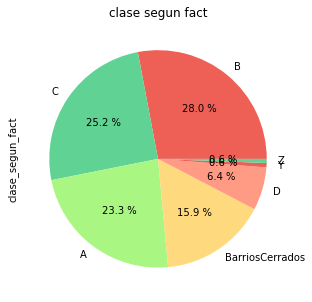

In [ ]:
#Graficamos cantidad de USUARIOS MEDIDOS-HABILITADOS-RESIDENCIALES según variable "clase segun fact"
colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]
dfObjetivo3['clase_segun_fact'].value_counts().plot(kind='pie', autopct="%0.1f %%", 
                                            figsize=(5, 5),
                                            title='clase segun fact',
                                            colors=colores,
)

plt.show() 

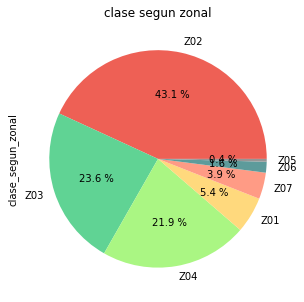

In [ ]:
#Graficamos cantidad de USUARIOS MEDIDOS-HABILITADOS-RESIDENCIALES según variable "clase segun zonal"
colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85","#5d9b9b","#979595"]
dfObjetivo3['clase_segun_zonal'].value_counts().plot(kind='pie', autopct="%0.1f %%", 
                                            figsize=(5, 5),
                                            title='clase segun zonal',
                                            colors=colores,
)

plt.show()

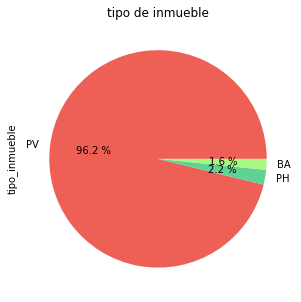

In [ ]:
#Graficamos cantidad de USUARIOS MEDIDOS-HABILITADOS-RESIDENCIALES según variable "tipo de inmueble"
colores = ["#EE6055","#60D394","#AAF683"]
dfObjetivo3['tipo_inmueble'].value_counts().plot(kind='pie', autopct="%0.1f %%", 
                                            figsize=(5, 5),
                                            title='tipo de inmueble',
                                            colors=colores,
)

plt.show()

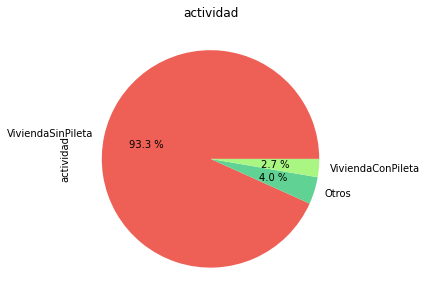

In [ ]:
#Graficamos cantidad de USUARIOS MEDIDOS-HABILITADOS-RESIDENCIALES según variable "actividad"
colores = ["#EE6055","#60D394","#AAF683"]
dfObjetivo3['actividad'].value_counts().plot(kind='pie', autopct="%0.1f %%", 
                                            figsize=(5, 5),
                                            title='actividad',
                                            colors=colores,
)

plt.show()

In [ ]:
dfObjetivo3.shape

(130329, 27)

##Se cruzan variables categóricas

In [ ]:
#actividad con tipo de inmueble
crosstab_act_tipoinm = pd.crosstab(index=dfObjetivo3['actividad'], columns=dfObjetivo3['tipo_inmueble'], margins=False, normalize=False )
crosstab_act_tipoinm

tipo_inmueble,BA,PH,PV
actividad,,,
Otros,2101,38,3117
ViviendaConPileta,0,39,3485
ViviendaSinPileta,1,2783,118765


In [ ]:
#actividad con clase segun zonal
crosstab_act_zonal = pd.crosstab(index=dfObjetivo3['actividad'], columns=dfObjetivo3['clase_segun_zonal'], margins=False, normalize=False )
crosstab_act_zonal

clase_segun_zonal,Z01,Z02,Z03,Z04,Z05,Z06,Z07
actividad,,,,,,,
Otros,319,2020,978,1028,135,355,421
ViviendaConPileta,8,472,294,913,35,218,1584
ViviendaSinPileta,6685,53733,29488,26622,372,1532,3117


In [ ]:
#clase segun fact con clase segun zonal
crosstab_fact_zonal = pd.crosstab(index=dfObjetivo3['clase_segun_fact'], columns=dfObjetivo3['clase_segun_zonal'], margins=False, normalize=False )
crosstab_fact_zonal

clase_segun_zonal,Z01,Z02,Z03,Z04,Z05,Z06,Z07
clase_segun_fact,,,,,,,
A,5729,22208,2494,0,0,0,0
B,16,15207,13589,7599,45,0,0
BarriosCerrados,0,830,2399,9987,241,2105,5122
C,1210,17356,10586,3641,0,0,0
D,0,0,1231,6878,227,0,0
Y,28,368,281,167,2,0,0
Z,29,256,180,291,27,0,0


###**Análisis variables numéricas / cuantitativas**

In [ ]:
#Transformamos datos numéricos de object a float

dfObjetivo3.prom_diario_año1 = dfObjetivo3.prom_diario_año1.astype(float)
dfObjetivo3.prom_diario_año2 = dfObjetivo3.prom_diario_año2.astype(float)
dfObjetivo3.prom_diario_año3 = dfObjetivo3.prom_diario_año3.astype(float)
dfObjetivo3.prom_diario_año4 = dfObjetivo3.prom_diario_año4.astype(float)
dfObjetivo3.prom_diario_año5 = dfObjetivo3.prom_diario_año5.astype(float)
dfObjetivo3.prom_diario_mes07 = dfObjetivo3.prom_diario_mes07.astype(float)
dfObjetivo3.prom_diario_mes08 = dfObjetivo3.prom_diario_mes08.astype(float)
dfObjetivo3.prom_diario_mes09 = dfObjetivo3.prom_diario_mes09.astype(float)
dfObjetivo3.prom_diario_mes10 = dfObjetivo3.prom_diario_mes10.astype(float)
dfObjetivo3.prom_diario_mes11 = dfObjetivo3.prom_diario_mes11.astype(float)
dfObjetivo3.prom_diario_mes12 = dfObjetivo3.prom_diario_mes12.astype(float)

In [ ]:
#Verificamos los tipos de las variables seleccionadas
dfObjetivo3.dtypes

unidad                        int64
clase_segun_fact             object
clase_segun_zonal            object
tipo_inmueble                object
actividad                    object
fecha_año1           datetime64[ns]
fecha_año2           datetime64[ns]
fecha_año3           datetime64[ns]
fecha_año4           datetime64[ns]
fecha_año5           datetime64[ns]
prom_diario_año1            float64
prom_diario_año2            float64
prom_diario_año3            float64
prom_diario_año4            float64
prom_diario_año5            float64
prom_diario_mes01           float64
prom_diario_mes02           float64
prom_diario_mes03           float64
prom_diario_mes04           float64
prom_diario_mes05           float64
prom_diario_mes06           float64
prom_diario_mes07           float64
prom_diario_mes08           float64
prom_diario_mes09           float64
prom_diario_mes10           float64
prom_diario_mes11           float64
prom_diario_mes12           float64
dtype: object

In [ ]:
dfObjetivo3['año5'] = pd.DatetimeIndex(dfObjetivo3['fecha_año5']).year

In [ ]:
dfObjetivo3['año4'] = pd.DatetimeIndex(dfObjetivo3['fecha_año4']).year

In [ ]:
dfObjetivo3['año3'] = pd.DatetimeIndex(dfObjetivo3['fecha_año3']).year

In [ ]:
dfObjetivo3['año2'] = pd.DatetimeIndex(dfObjetivo3['fecha_año2']).year

In [ ]:
dfObjetivo3['año1'] = pd.DatetimeIndex(dfObjetivo3['fecha_año1']).year

In [ ]:
dfObjetivo3.head(2)

,unidad,clase_segun_fact,clase_segun_zonal,tipo_inmueble,actividad,fecha_año1,fecha_año2,fecha_año3,fecha_año4,fecha_año5,prom_diario_año1,prom_diario_año2,prom_diario_año3,prom_diario_año4,prom_diario_año5,prom_diario_mes01,prom_diario_mes02,prom_diario_mes03,prom_diario_mes04,prom_diario_mes05,prom_diario_mes06,prom_diario_mes07,prom_diario_mes08,prom_diario_mes09,prom_diario_mes10,prom_diario_mes11,prom_diario_mes12,año5,año4,año3,año2,año1
4,200071,B,Z02,PV,Otros,2013-11-21,2014-11-19,2015-11-17,2016-11-16,2017-11-15,1.14,1.09,1.34,1.25,0.50,NaN,NaN,NaN,NaN,NaN,0.60,0.57,0.45,0.41,0.49,0.45,0.55,2017.0,2016.0,2015.0,2014.0,2013.0
5,200087,B,Z02,PV,ViviendaSinPileta,NaT,2014-11-19,2015-11-17,2016-11-16,2017-11-15,NaN,0.62,0.64,0.44,0.73,NaN,NaN,NaN,NaN,NaN,0.86,1.41,0.85,0.41,0.36,0.47,0.85,2017.0,2016.0,2015.0,2014.0,NaN


In [ ]:
dfObjetivo3.shape

(130329, 32)

In [ ]:
dfObjetivo3.dtypes

unidad                        int64
clase_segun_fact             object
clase_segun_zonal            object
tipo_inmueble                object
actividad                    object
fecha_año1           datetime64[ns]
fecha_año2           datetime64[ns]
fecha_año3           datetime64[ns]
fecha_año4           datetime64[ns]
fecha_año5           datetime64[ns]
prom_diario_año1            float64
prom_diario_año2            float64
prom_diario_año3            float64
prom_diario_año4            float64
prom_diario_año5            float64
prom_diario_mes01           float64
prom_diario_mes02           float64
prom_diario_mes03           float64
prom_diario_mes04           float64
prom_diario_mes05           float64
prom_diario_mes06           float64
prom_diario_mes07           float64
prom_diario_mes08           float64
prom_diario_mes09           float64
prom_diario_mes10           float64
prom_diario_mes11           float64
prom_diario_mes12           float64
año5                        

####Se procede a observar en detalle las variables con datos faltantes

In [ ]:
#Detección las variables con datos faltantes
missing_values_count = dfObjetivo3.isna().sum()
missing_values_count 
missing_values_count/ dfObjetivo3.shape[0]*100

unidad                0.000000
clase_segun_fact      0.000000
clase_segun_zonal     0.000000
tipo_inmueble         0.000000
actividad             0.000000
fecha_año1           22.290511
fecha_año2           13.498914
fecha_año3           10.544085
fecha_año4            6.848821
fecha_año5            2.043290
prom_diario_año1     22.290511
prom_diario_año2     13.498914
prom_diario_año3     10.544085
prom_diario_año4      6.848821
prom_diario_año5      2.043290
prom_diario_mes01    89.104497
prom_diario_mes02    86.079844
prom_diario_mes03    84.954999
prom_diario_mes04    84.499229
prom_diario_mes05    84.464701
prom_diario_mes06    56.981946
prom_diario_mes07     4.660513
prom_diario_mes08     3.808055
prom_diario_mes09     2.817485
prom_diario_mes10     2.341766
prom_diario_mes11     1.679595
prom_diario_mes12     0.893124
año5                  2.043290
año4                  6.848821
año3                 10.544085
año2                 13.498914
año1                 22.290511
dtype: f

Se analiza la variable **prom_diario_año**:

In [ ]:
dfResumido=dfObjetivo3[['prom_diario_año1','prom_diario_año2','prom_diario_año3','prom_diario_año4','prom_diario_año5']]
dfResumido.describe()

,prom_diario_año1,prom_diario_año2,prom_diario_año3,prom_diario_año4,prom_diario_año5
count,101278.000000,112736.000000,116587.000000,121403.000000,127666.000000
mean,1.110037,1.017945,0.771275,0.724856,0.776674
std,2.453953,2.089848,1.968049,1.358327,4.974794
min,0.000000,0.000000,-254.770000,0.000000,0.000000
25%,0.400000,0.360000,0.320000,0.310000,0.310000
50%,0.680000,0.610000,0.550000,0.540000,0.540000
75%,1.140000,1.010000,0.880000,0.860000,0.870000
max,345.690000,170.500000,266.420000,179.270000,1693.950000


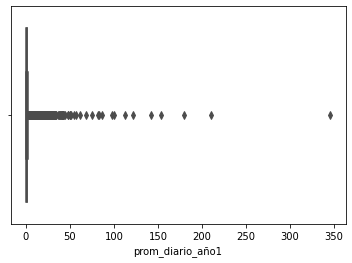

In [ ]:
#Se analizan las columnas que contienen Consumo Diario Promedio para cada año
sns.boxplot(x="prom_diario_año1" , data=dfObjetivo3, palette="Set1")

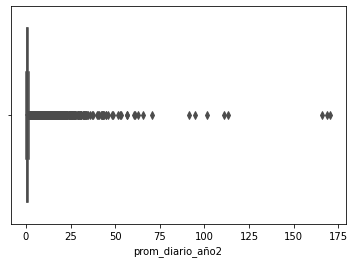

In [ ]:
sns.boxplot(x="prom_diario_año2" , data=dfObjetivo3, palette="Set1")

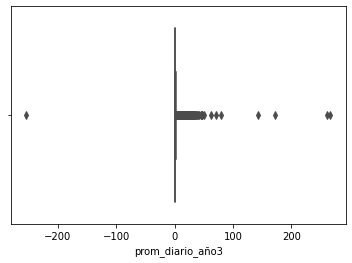

In [ ]:
sns.boxplot(x="prom_diario_año3" , data=dfObjetivo3, palette="Set1")

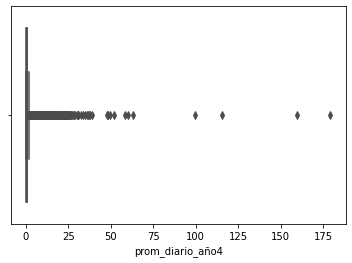

In [ ]:
sns.boxplot(x="prom_diario_año4" , data=dfObjetivo3, palette="Set1")

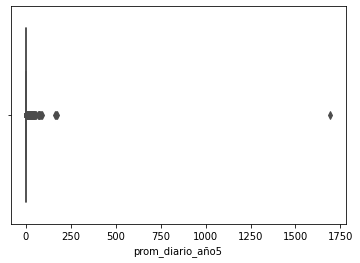

In [ ]:
sns.boxplot(x="prom_diario_año5" , data=dfObjetivo3, palette="Set1")

####Valores extremos
En el Consumo Diario Promedio de cada uno de los 5 años, se observa la presencia de valores extremos, son valores realmente grandes que dificultan visualizar el comportamiento de la variable. 

Se considerarán valores extremos a aquellos observados en el set de datos que superen 3 veces el recorrido intercuartílico.

Se establecen límites para los valores de la variable Consumo Diario de cada año. Si existen valores que superan dicho limíte, se procede a reducir el conjunto de datos de manera que queden eliminados los valores extremos.

In [ ]:
# Establecemos limites para los valores de la variable Consumo Diario Promedio
# RI=Q3-Q1 :  Recorrido intrecuartilico. 
# LSE= Q3+3*RI : Límite superior para valores extremos a partir de la cuál cualquier valor observado que supere dicho límite será considerado "extremo" para el conjunto de datos analizado. 

Q1=dfObjetivo3.prom_diario_año1.quantile(q=0.25)
Q3=dfObjetivo3.prom_diario_año1.quantile(q=0.75)
LSE=Q3+3*(Q3-Q1)
print(Q1,Q3,LSE)

0.4 1.14 3.3599999999999994


In [ ]:
pd.value_counts(dfObjetivo3['prom_diario_año1']< LSE.sum()).sort_index()

False    34325
True     96004
Name: prom_diario_año1, dtype: int64

In [ ]:
dfObj_limp1 = dfObjetivo3[dfObjetivo3['prom_diario_año1']< LSE]
print(dfObj_limp1.shape)

(96004, 32)


In [ ]:
Q1=dfObj_limp1.prom_diario_año2.quantile(q=0.25)
Q3=dfObj_limp1.prom_diario_año2.quantile(q=0.75)
LSE=Q3+3*(Q3-Q1)
print(Q1,Q3,LSE)

0.33 0.85 2.41


In [ ]:
pd.value_counts(dfObj_limp1['prom_diario_año2']< LSE.sum()).sort_index()

False      980
True     95024
Name: prom_diario_año2, dtype: int64

In [ ]:
dfObj_limp2 = dfObj_limp1[dfObj_limp1['prom_diario_año2']< LSE]
print(dfObj_limp2.shape)

(95024, 32)


In [ ]:
Q1=dfObj_limp2.prom_diario_año3.quantile(q=0.25)
Q3=dfObj_limp2.prom_diario_año3.quantile(q=0.75)
LSE=Q3+3*(Q3-Q1)
print(Q1,Q3,LSE)

0.32 0.83 2.36


In [ ]:
pd.value_counts(dfObj_limp2['prom_diario_año3']< LSE.sum()).sort_index()

False      579
True     94445
Name: prom_diario_año3, dtype: int64

In [ ]:
dfObj_limp3 = dfObj_limp2[dfObj_limp2['prom_diario_año3']< LSE]
print(dfObj_limp3.shape)

(94445, 32)


In [ ]:
Q1=dfObj_limp3.prom_diario_año4.quantile(q=0.25)
Q3=dfObj_limp3.prom_diario_año4.quantile(q=0.75)
LSE=Q3+3*(Q3-Q1)
print(Q1,Q3,LSE)

0.31 0.82 2.35


In [ ]:
pd.value_counts(dfObj_limp3['prom_diario_año4']< LSE.sum()).sort_index()

False      458
True     93987
Name: prom_diario_año4, dtype: int64

In [ ]:
dfObj_limp4 = dfObj_limp3[dfObj_limp3['prom_diario_año4']< LSE]
print(dfObj_limp4.shape)

(93987, 32)


In [ ]:
Q1=dfObj_limp4.prom_diario_año5.quantile(q=0.25)
Q3=dfObj_limp4.prom_diario_año5.quantile(q=0.75)
LSE=Q3+3*(Q3-Q1)
print(Q1,Q3,LSE)

0.31 0.81 2.31


In [ ]:
pd.value_counts(dfObj_limp4['prom_diario_año5']< LSE.sum()).sort_index()

False      518
True     93469
Name: prom_diario_año5, dtype: int64

In [ ]:
dfObj_limp5 = dfObj_limp4[dfObj_limp4['prom_diario_año5']< LSE]
print(dfObj_limp5.shape)

(93469, 32)


In [ ]:
dfObj_limp = dfObj_limp5

In [ ]:
#Detección las variables con datos faltantes
missing_values_count = dfObj_limp.isna().sum()
missing_values_count 
missing_values_count/ dfObj_limp.shape[0]*100

unidad                0.000000
clase_segun_fact      0.000000
clase_segun_zonal     0.000000
tipo_inmueble         0.000000
actividad             0.000000
fecha_año1            0.000000
fecha_año2            0.000000
fecha_año3            0.000000
fecha_año4            0.000000
fecha_año5            0.000000
prom_diario_año1      0.000000
prom_diario_año2      0.000000
prom_diario_año3      0.000000
prom_diario_año4      0.000000
prom_diario_año5      0.000000
prom_diario_mes01    88.178968
prom_diario_mes02    84.591683
prom_diario_mes03    83.189079
prom_diario_mes04    82.631675
prom_diario_mes05    82.625255
prom_diario_mes06    54.085312
prom_diario_mes07     0.000000
prom_diario_mes08     0.000000
prom_diario_mes09     0.000000
prom_diario_mes10     0.000000
prom_diario_mes11     0.000000
prom_diario_mes12     0.000000
año5                  0.000000
año4                  0.000000
año3                  0.000000
año2                  0.000000
año1                  0.000000
dtype: f

In [ ]:
dfResumido=dfObj_limp[['prom_diario_año1','prom_diario_año2','prom_diario_año3','prom_diario_año4','prom_diario_año5']]
dfResumido.describe()

,prom_diario_año1,prom_diario_año2,prom_diario_año3,prom_diario_año4,prom_diario_año5
count,93469.000000,93469.000000,93469.000000,93469.000000,93469.000000
mean,0.779223,0.615852,0.607017,0.599612,0.600573
std,0.594219,0.403921,0.403068,0.401230,0.402791
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.380000,0.330000,0.320000,0.310000,0.310000
50%,0.630000,0.540000,0.530000,0.520000,0.520000
75%,1.010000,0.820000,0.820000,0.810000,0.810000
max,3.350000,2.400000,2.350000,2.340000,2.300000


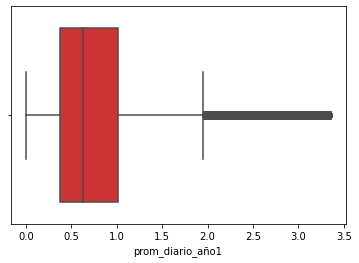

In [ ]:
sns.boxplot(x="prom_diario_año1" , data=dfObj_limp, palette="Set1")

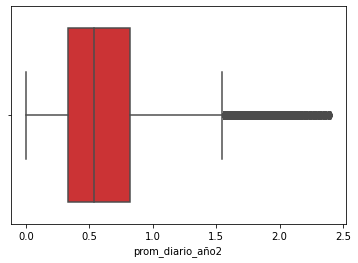

In [ ]:
sns.boxplot(x="prom_diario_año2" , data=dfObj_limp, palette="Set1")

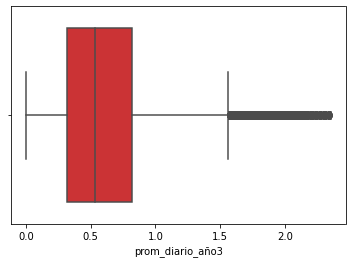

In [ ]:
sns.boxplot(x="prom_diario_año3" , data=dfObj_limp, palette="Set1")

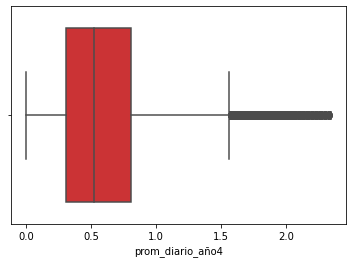

In [ ]:
sns.boxplot(x="prom_diario_año4" , data=dfObj_limp, palette="Set1")

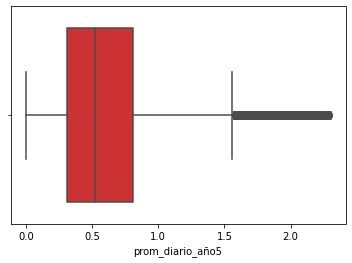

In [ ]:
sns.boxplot(x="prom_diario_año5" , data=dfObj_limp, palette="Set1")

**En los datos de Consumo Promedio Diario de los usuarios medidos, con servicio habilitado y tipo residencial, se observa una disminución del consumo promedio diario a lo largo de los 5 años analizados.**

###**Cruce de variables cuantitativas con categóricas**

####Se analiza el consumo diario promedio de cada año para Viviendas con pileta, Viviendas sin pileta y otras actividades

In [ ]:
dfResumido2=dfObj_limp[['actividad','prom_diario_año1','prom_diario_año2','prom_diario_año3','prom_diario_año4','prom_diario_año5']]
dfResumido2.groupby(by='actividad').mean()

,prom_diario_año1,prom_diario_año2,prom_diario_año3,prom_diario_año4,prom_diario_año5
actividad,,,,,
Otros,0.719109,0.586979,0.577010,0.586430,0.597285
ViviendaConPileta,1.140041,0.968466,0.932035,0.916488,0.930948
ViviendaSinPileta,0.770742,0.606817,0.598774,0.591173,0.591513


Para graficar se utiliza como variable cuantitativa el Consumo Promedio Diario del año 5, por tratarse del último año registrado

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



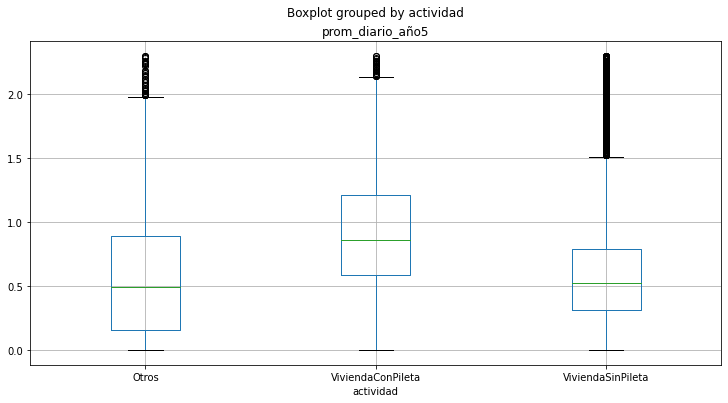

In [ ]:
boxplot = dfResumido2.boxplot(column=['prom_diario_año5'],by='actividad', figsize=(12,6), return_type='axes')


**En los datos de Consumo Promedio Diario de los usuarios medidos, con servicio habilitado y tipo residencial, dentro de la categoría "actividad" se observa un mayor consumo en las Viviendas con Pileta.**

####Se analiza el consumo diario promedio de cada año para inmuebles PV, PH y BA

In [ ]:
dfResumido3=dfObj_limp[['tipo_inmueble','prom_diario_año1','prom_diario_año2','prom_diario_año3','prom_diario_año4','prom_diario_año5']]
dfResumido3.groupby(by='tipo_inmueble').mean()

,prom_diario_año1,prom_diario_año2,prom_diario_año3,prom_diario_año4,prom_diario_año5
tipo_inmueble,,,,,
BA,0.268060,0.213653,0.196441,0.166874,0.191092
PH,0.626931,0.439179,0.438247,0.435129,0.439480
PV,0.785660,0.622205,0.613240,0.605867,0.606615


Para graficar se utiliza como variable cuantitativa el Consumo Promedio Diario del año 5, por tratarse del último año registrado

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



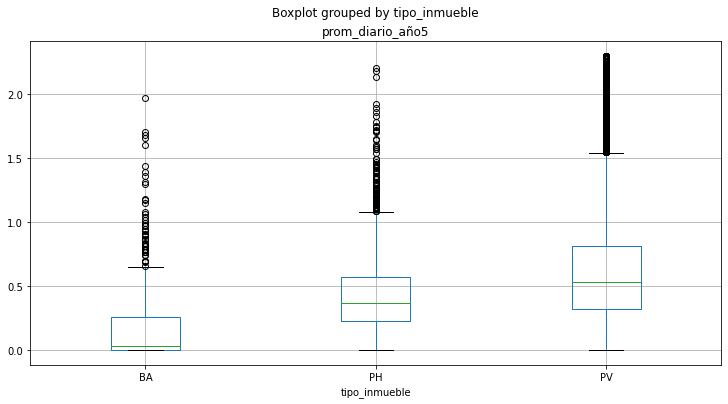

In [ ]:
boxplot = dfResumido3.boxplot(column=['prom_diario_año5'], by='tipo_inmueble', figsize=(12,6), return_type='axes')

**En los datos de Consumo Promedio Diario de los usuarios medidos, con servicio habilitado y tipo residencial, dentro de la categoría "tipo de inmueble" se observa un mayor consumo en las propiedades de Propiedad Vertical.**

####Se analiza el consumo diario promedio de cada año según la clase socionómica definida por la variable zonal

In [ ]:
dfResumido4=dfObj_limp[['clase_segun_zonal','prom_diario_año1','prom_diario_año2','prom_diario_año3','prom_diario_año4','prom_diario_año5']]
dfResumido4.groupby(by='clase_segun_zonal').mean()

,prom_diario_año1,prom_diario_año2,prom_diario_año3,prom_diario_año4,prom_diario_año5
clase_segun_zonal,,,,,
Z01,0.572758,0.534532,0.540523,0.526664,0.535798
Z02,0.770732,0.555980,0.552987,0.545522,0.548664
Z03,0.731259,0.625017,0.616972,0.608006,0.604238
Z04,0.826666,0.657563,0.638146,0.632721,0.627950
Z05,0.792853,0.664236,0.681729,0.664899,0.663458
Z06,0.771338,0.629693,0.644189,0.679331,0.705285
Z07,1.115326,0.952371,0.927511,0.914839,0.954090


Para graficar se utiliza como variable cuantitativa el Consumo Promedio Diario del año 5, por tratarse del último año registrado


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



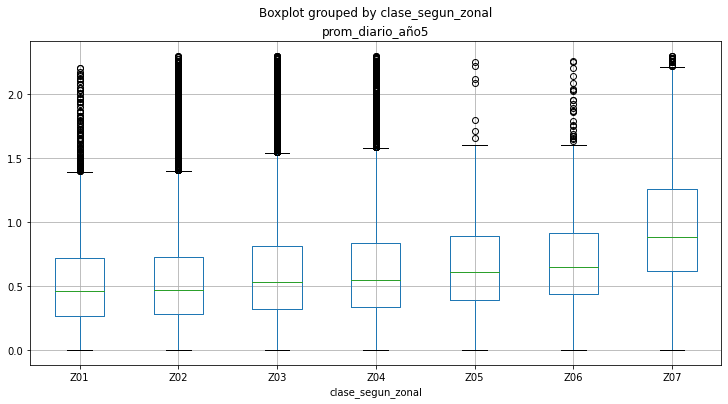

In [ ]:
boxplot = dfResumido4.boxplot(column=['prom_diario_año5'], by='clase_segun_zonal', figsize=(12,6), return_type='axes')

**En los datos de Consumo Promedio Diario de los usuarios medidos, con servicio habilitado y tipo residencial, dentro de la categoría "clase según zonal" se observa un mayor consumo a medida que se sube en el nivel del zonal.**

###**Se crea una nueva base de datos en formato excel con todas las transformaciones efectuadas a la base de datos original a través del análisis exploratorio de datos realizado**

In [ ]:
#Exportamos el dataframe obtenido a un archivo excel
dfObj_limp.to_excel('BaseACAnalizada.xlsx')

###**Por último, se busca identificar si existe algún tipo de estacionalidad en el consumo de agua**

Para ello se utlizan las variables Consumo Diario Promedio por mes, teniendo datos de 12 meses. Los únicos usuarios a los que se les efectúa medición mensual son los M04 dentro de la variable categórica clase segun factura (BarriosCerrados)

In [ ]:
dfResumido5=dfObj_limp[['clase_segun_fact','prom_diario_mes01','prom_diario_mes02','prom_diario_mes03','prom_diario_mes04','prom_diario_mes05','prom_diario_mes06','prom_diario_mes07','prom_diario_mes08','prom_diario_mes09','prom_diario_mes10','prom_diario_mes11','prom_diario_mes12']]
Estacionalidad = dfResumido5.groupby(by='clase_segun_fact').mean()
Estacionalidad.head(7)

,prom_diario_mes01,prom_diario_mes02,prom_diario_mes03,prom_diario_mes04,prom_diario_mes05,prom_diario_mes06,prom_diario_mes07,prom_diario_mes08,prom_diario_mes09,prom_diario_mes10,prom_diario_mes11,prom_diario_mes12
clase_segun_fact,,,,,,,,,,,,
A,NaN,0.770000,0.660000,1.386000,0.602000,0.486667,0.496496,0.479476,0.519358,0.512997,0.615809,0.565850
B,0.310000,0.168182,0.290000,0.496875,0.510500,0.613444,0.599461,0.542815,0.538014,0.563282,0.567472,0.624996
BarriosCerrados,0.655016,0.691078,0.776659,0.776307,0.714418,0.756662,0.787910,0.930910,0.960951,1.012352,0.947595,1.052518
C,NaN,0.933333,1.260000,0.728000,0.700000,0.874286,0.591342,0.550836,0.557463,0.569865,0.613093,0.633088
D,0.395000,0.250000,0.230000,0.642500,0.612500,0.818333,0.612793,0.581571,0.594702,0.605416,0.698511,0.664771
Y,NaN,NaN,NaN,NaN,0.630000,0.678942,0.642127,0.613172,0.644851,0.639179,0.651306,0.692705
Z,NaN,NaN,NaN,NaN,NaN,NaN,0.665150,0.624133,0.612817,0.604283,0.683333,0.682867


In [ ]:
#Traemos las fechas de los lo consumos diarios promedio por mes de la base de datos original
dfMeses = dfAC[['fec_has_m01','fec_has_m02','fec_has_m03','fec_has_m04','fec_has_m05','fec_has_m06','fec_has_m07','fec_has_m08','fec_has_m09','fec_has_m10','fec_has_m11','fec_has_m12']]
dfMeses.head(1)

,fec_has_m01,fec_has_m02,fec_has_m03,fec_has_m04,fec_has_m05,fec_has_m06,fec_has_m07,fec_has_m08,fec_has_m09,fec_has_m10,fec_has_m11,fec_has_m12
0,2017-05-08,2017-06-07,2017-07-07,2017-08-04,2017-09-05,2017-10-05,2017-11-06,2017-12-05,2018-01-09,2018-02-06,2018-03-09,2018-04-09


In [ ]:
#Renombramos columnas
dfResumido5.columns=['clase_segun_fact','May17','Jun17','Jul17','Ago17','Sep17','Oct17','Nov17','Dic17','Ene18','Feb18','Mar18','Abr18']


In [ ]:
#Filtramos el dataframe aplicando la condición de que sea Barrios Cerrados, ya que esta categoría es a la que se le efectúa medición mensual

BarriosCerrados= dfResumido5['clase_segun_fact']=='BarriosCerrados'

dfBarriosCerrados = dfResumido5[BarriosCerrados]
pd.options.display.max_columns
pd.options.display.max_columns = None

Estacionalidad = dfBarriosCerrados.groupby(by='clase_segun_fact').mean()
Estacionalidad.head()

,May17,Jun17,Jul17,Ago17,Sep17,Oct17,Nov17,Dic17,Ene18,Feb18,Mar18,Abr18
clase_segun_fact,,,,,,,,,,,,
BarriosCerrados,0.655016,0.691078,0.776659,0.776307,0.714418,0.756662,0.78791,0.93091,0.960951,1.012352,0.947595,1.052518


**Es posible observar una estacionalidad en el consumo de agua, que podría ser explicada entre otros factores por el clima a lo largo de los meses del año.**

## Conclusión

El análisis del consumo de agua fue realizado sobre usuarios **con medidor, servicio habilitado y de tipo residencial**, cuyos datos de consumo fueron recopilados por la Empresa Prestadora del Servicio. 

Se observó que la media del consumo promedio diario de agua por unidad para el año 5 (2017) fue de 0,6 m3/unidad/d.

Se observó que el consumo de agua potable de los usuarios medidos, con servicio habilitado y tipo residencial es influenciado por:
 
*   **zonal socioeconómico**, dentro de la categoría "clase según zonal" se observa un mayor consumo a medida que se sube en el nivel del zonal.

*   **tipo de inmueble**, dentro de la categoría "tipo de inmueble" se observa un mayor consumo en las propiedades de Propiedad Vertical.

*   **existencia de pileta**, dentro de la categoría "actividad" se observa un mayor consumo en las Viviendas con Pileta.

También se observó variaciones interanuales y estacionales en el consumo de agua.

La **variación interanual** se expresa por la evolución de la demanda durante varios años debida a diferentes factores (podría explicarse por la dinámica de la población, alteraciones en su estilo de vida, por el cambio climático y cierta toma de conciencia, etc). Se observó una dismimución en la media del consumo promedio diario a lo largo de los 5 años analizados. 

La **variación estacional** es influenciada por las diferencias en el clima de las estaciones del año. Para los usuarios residenciales pertenecientes a la categoría Barrios Cerrados, de los que se obtienen mediciones mensuales, se pudo observar variación estacional en el consumo.

